# Titanic Survival Prediction
https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Data loading 
df  = pd.read_csv("data/train.csv")
df .head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df .shape)

(891, 12)


##
Dealing with null values

In [4]:
# checking the missing values in each column
df .isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Cabin column have too many null values (687/891). Therefore it is better to drop it

df.drop(columns='Cabin', axis=1, inplace=True)

In [6]:
# Filling missing values in the Age column using the mean age of passengers within the same Pclass.
print(df.groupby("Pclass")["Age"].mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [7]:
print(df.groupby("Pclass")["Age"].transform(lambda x: round(x.mean())))

0      25
1      38
2      25
3      38
4      25
       ..
886    30
887    38
888    25
889    38
890    25
Name: Age, Length: 891, dtype: int64


In [8]:
df["Age"] = df["Age"].fillna(df.groupby("Pclass")["Age"].transform(lambda x: round(x.mean())))



In [9]:
# Dropping the 2 Embark rows with null value

df.dropna(subset=["Embarked"],inplace=True) 
#OR
# df = df.dropna(subset=["Embarked"])

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##
Data analysis

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

##
Data visualisation 


<Axes: xlabel='Survived', ylabel='count'>

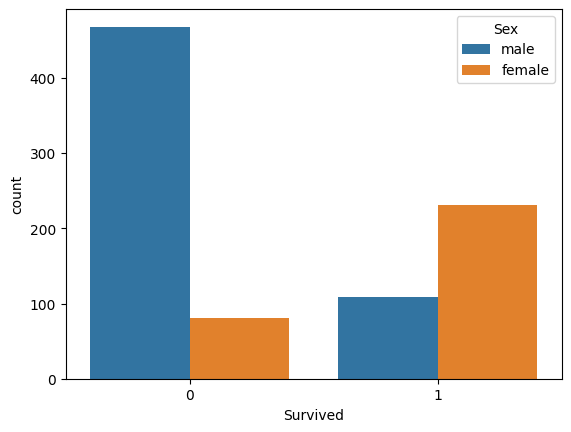

In [13]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=df, hue='Sex')

In [14]:
print("total\n",df['Sex'].value_counts(),end='\n \n')
print("survived\n",df['Sex'][df['Survived']==1].value_counts(),end='\n\n')
print("not survived\n",df['Sex'][df['Survived']==0].value_counts())
# female were the one who survived more (as prefrence to female were given first)

total
 Sex
male      577
female    312
Name: count, dtype: int64
 
survived
 Sex
female    231
male      109
Name: count, dtype: int64

not survived
 Sex
male      468
female     81
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

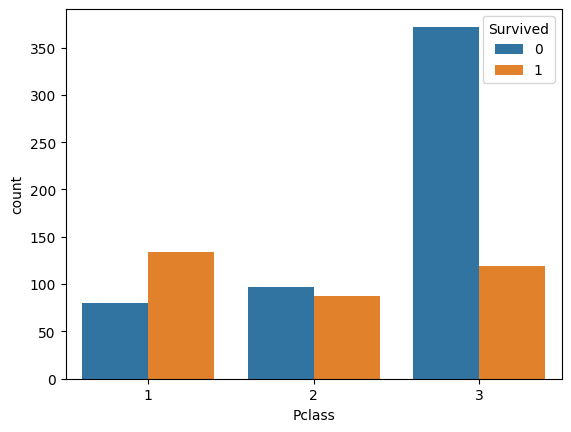

In [15]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass',hue="Survived", data=df)

##
By Above Graph: Higher Pclass means Higher survival chance

In [16]:
# converting categorical Columns into numeric columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

df['Sex'] = df['Sex'].astype('int64')
df['Embarked'] = df['Embarked'].astype('int64')

#future versions of Pandas won’t change the data type automatically. (string to int)

#OR
# df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype('int64')
# df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype('int64')



C:\Users\aksha\AppData\Local\Temp\ipykernel_13324\1445851532.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


##
Train_Test_split

In [17]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=101)

##
Scaling data

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




##
LogisticRegression Model Training

In [74]:
LR = LogisticRegression()
LR.fit(X_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [75]:
LR=LogisticRegression(max_iter=300)
LR.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


##
<span style="font-size:12px">If max_iter is low (default=100) it will give error: "STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT"</span><br>
<span style="font-size:12px">The Logistic Regression model tried to learn, but it gave up early because it was taking too long and hit its maximum tries (100 attempts). As, Logistic regression learns by trying again and again (iterations) to find the best solution.</span>


##
Prediction


In [76]:

lr_prediction=LR.predict(X_test)

In [77]:
lr_accuracy = metrics.accuracy_score(Y_test, lr_prediction)
print('Accuracy score of X_test data : ', lr_accuracy)

Accuracy score of X_test data :  0.8146067415730337


##
creating xgboost regressor model

In [78]:

from xgboost import XGBClassifier
model = XGBClassifier()

In [79]:
model.fit(X_train, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


##
Prediction

In [80]:
xgb_prediction=model.predict(X_test)
xgb_prediction

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0])

In [81]:
xgb_accuracy = metrics.accuracy_score(Y_test, xgb_prediction)
print('Accuracy score of X_test data : ', xgb_accuracy)

Accuracy score of X_test data :  0.8314606741573034


##
creating RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [83]:
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
rf_predictions = rf_model.predict(X_test)

In [85]:
rf_accuracy = metrics.accuracy_score(Y_test, rf_predictions)
print('Accuracy score of X_test data : ', rf_accuracy)

Accuracy score of X_test data :  0.7921348314606742


##
Trying with new data (test.csv file in 'data' folder)

In [86]:
test_data=pd.read_csv("data/test.csv")

In [87]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [88]:
test_data_X= test_data.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1)


In [89]:
test_data_X.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

test_data_X['Sex'] = test_data_X['Sex'].astype('int64')
test_data_X['Embarked'] = test_data_X['Embarked'].astype('int64')

C:\Users\aksha\AppData\Local\Temp\ipykernel_13324\3559879276.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_X.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [90]:
test_data_X["Age"] = test_data_X["Age"].fillna(test_data_X.groupby("Pclass")["Age"].transform(lambda x: round(x.mean())))
test_data_X["Fare"] = test_data_X["Fare"].fillna(test_data_X['Fare'].mean())
test_data_X = scaler.transform(test_data_X)

##
LogisticRegression prediction

In [91]:
lr_pred=LR.predict(test_data_X)
lr_pred

d:\python\ml_dl_course_proj\3.Titanic Survival Prediction\Titanic-Survival-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

##
XGBClassifier prediction

In [92]:
xgb_pred=model.predict(test_data_X)
xgb_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

##
RandomForestClassifier prediction

In [93]:
rf_pred=rf_model.predict(test_data_X)
rf_pred

d:\python\ml_dl_course_proj\3.Titanic Survival Prediction\Titanic-Survival-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

##
Actual prediction file (actual_test_survival in 'data' folder)

In [94]:
actual=pd.read_csv('data/actual_test_survival.csv')
S=actual['Survived'].values

##
comparing the result


In [95]:
comparison = (S == lr_pred)
print(f"Number of correct predictions of LR: {comparison.sum()} out of {len(comparison)}")
print(f"Accuracy: {comparison.sum() / len(comparison)}")

comparison = (S == xgb_pred)
print(f"Number of correct predictions of XG: {comparison.sum()} out of {len(comparison)}")
print(f"Accuracy: {comparison.sum() / len(comparison)}")

comparison = (S == rf_pred)
print(f"Number of correct predictions of RF: {comparison.sum()} out of {len(comparison)}")
print(f"Accuracy: {comparison.sum() / len(comparison)}")

Number of correct predictions of LR: 298 out of 418
Accuracy: 0.7129186602870813
Number of correct predictions of XG: 418 out of 418
Accuracy: 1.0
Number of correct predictions of RF: 376 out of 418
Accuracy: 0.8995215311004785


## 
saving the new file

In [96]:
test_data_with_preds = test_data.copy()
test_data_with_preds["Survived_Prediction"] = xgb_pred

In [97]:
test_data_with_preds.to_csv("test_with_predictions.csv", index=False)